# 比特幣價格

In [3]:
import requests
from bs4 import BeautifulSoup
res = requests.get('https://www.coingecko.com/chart/1/twd.json?locale=zh-tw')

In [4]:
data_prices = res.json()['stats']

In [5]:
import pandas
df = pandas.DataFrame(data_prices)

In [6]:
df.columns = ['datetime', 'twd']

In [7]:
df['datetime'] = pandas.to_datetime(df['datetime'], unit='ms')

In [8]:
df.head()

,datetime,twd
0,2013-04-29,4262.3287
1,2013-04-30,4104.9241
2,2013-05-01,3433.0342
3,2013-05-02,3136.7031
4,2013-05-03,2902.5621


In [9]:
df.index = df['datetime']

Populating the interactive namespace from numpy and matplotlib


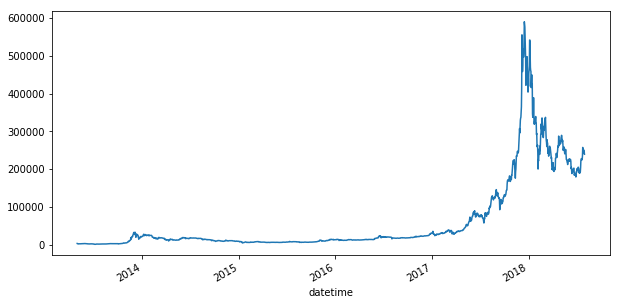

In [10]:
%pylab inline
df['twd'].plot(kind = 'line', figsize = [10,5])

In [12]:
df['ma7'] = df['twd'].rolling(window = 7).mean()

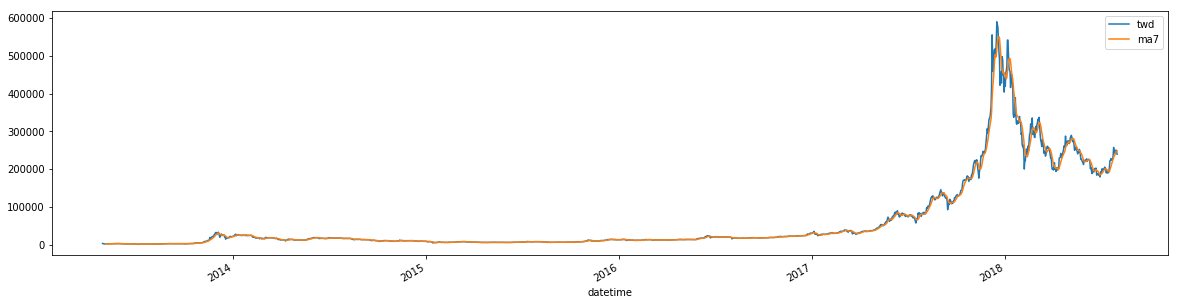

In [13]:
df[['twd', 'ma7']].plot(kind = 'line', figsize=[20,5])

In [14]:
df2 = df[df['datetime'] >= '2017-01-01']

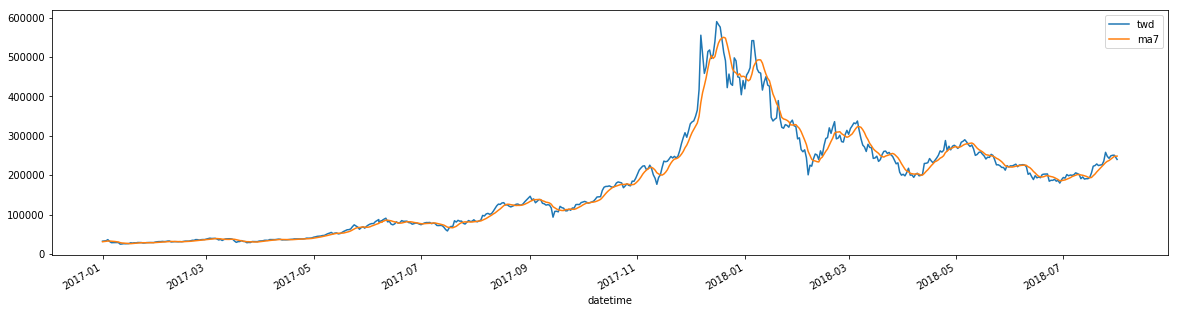

In [16]:
df2[['twd', 'ma7']].plot(kind = 'line', figsize=[20,5])

## ＄Bicoin Crawler Demo 

### Import module
- requests: for internet connecting and vistit website with python.
- pandas: for dataframe building, which is easier using for data science.
- json: for json-formatted data transforming

In [2]:
import requests
import pandas as pd
import time
import json

In [3]:
today = time.strftime('%Y-%m-%d',time.localtime(time.time()))
url = "https://api.coindesk.com/charts/data?data=close&startdate=2010-07-19&enddate="+today+"&exchanges=bpi&dev=1&index=USD"

res = requests.get(url)
raw = res.text

In [4]:
index = []
value = []

data = raw.split('(')[1].split(')')[0]
data
data_j = json.loads(data)

for k in data_j['bpi']:
    st = time.localtime(float(str(k[0])[:10]))
    index.append(time.strftime('%Y-%m-%d',st))
    value.append(k[1])

In [8]:
df = pd.DataFrame({'value':value},index=index)
df

,value
2010-07-18,0.09
2010-07-19,0.08
2010-07-20,0.07
2010-07-21,0.08
2010-07-22,0.05
2010-07-23,0.06
2010-07-24,0.05
2010-07-25,0.05
2010-07-26,0.06
2010-07-27,0.06
